Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 



In [140]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [141]:
df = pd.read_csv('loan_prediction.csv')

In [142]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [143]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [144]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [146]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [147]:
df['Loan_ID'].value_counts()

LP002403    1
LP001036    1
LP002855    1
LP001949    1
LP002342    1
           ..
LP002716    1
LP001155    1
LP002560    1
LP002544    1
LP002529    1
Name: Loan_ID, Length: 614, dtype: int64

In [148]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [149]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [150]:
df['Dependents'].value_counts()

# 3+ cover a wide array hence i am converting 3+ into 3 only since anyvalue =or > 3 has the same effect

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [151]:
df['Education'].value_counts()



Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [152]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [197]:
df['ApplicantIncome'].value_counts()

2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [198]:
df['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [199]:
df['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
211.000000     1
250.000000     1
62.000000      1
85.000000      1
436.000000     1
Name: LoanAmount, Length: 204, dtype: int64

In [200]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [201]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [202]:
df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [203]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

1. Loan_ID, -- 0 null
2. Gender, 
3. Married 
4. Dependents'
5. Education  -- 0 nul
6. Self_Employed'
7. Property_Area , --- o null
8. Loan_Status  ---- 0 null


are object and but these 4 have o null values hence lets treat them first. Education,m Property Area and Loan Status can be done with label encoding

In [204]:
y = df['Loan_Status']

In [205]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


In [206]:
ordedu= OrdinalEncoder(categories=[['Not Graduate','Graduate']])

dfi = ordedu.fit_transform(df[['Education']])
dfi

ValueError: could not convert string to float: 'Not Graduate'

Override Education content coumn with codes

In [207]:
df['Education'] = dfi

In [208]:
pd.DataFrame(ordedu.transform(df[['Education']]))

ValueError: The number of features in X is different to the number of features of the fitted data. The fitted data had 0 features and the X has 1 features.

In [209]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1.0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,1.0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,1.0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,0.0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,1.0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1.0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3.0,1.0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1.0,1.0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2.0,1.0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [210]:
lab_enc = LabelEncoder()
data2 = lab_enc.fit_transform(df['Property_Area'])
pd.Series(data2)
df['Property_Area'] = data2     # replace that original column with new column
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1.0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,1.0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,1.0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,0.0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,1.0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1.0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3.0,1.0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1.0,1.0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2.0,1.0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [211]:
data3 = lab_enc.fit_transform(df['Loan_Status'])
pd.Series(data3)
df['Loan_Status'] = data3     # replace that original column with new column
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1.0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,1.0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,1.0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,0.0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,1.0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1.0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3.0,1.0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1.0,1.0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2.0,1.0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int32(3), int64(3)
memory usage: 50.5 KB


I am using mean for numerical loan amount inputation

In [213]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

I am using mode for categorical column imputation

In [214]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [215]:
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].median())


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int32(3), int64(3)
memory usage: 50.5 KB


In [217]:
df['Dependents'] = df['Dependents'].replace('3+',3)

In [218]:
df['Dependents'].value_counts()

0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [219]:
df['Dependents']= df['Dependents'].fillna(df['Dependents'].median())


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int32(3), int64(3)
memory usage: 50.5 KB


In [221]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1.0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,1.0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,1.0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,0.0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,1.0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1.0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3.0,1.0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1.0,1.0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2.0,1.0,0,7583,0.0,187.000000,360.0,1.0,2,1


Here my data is now ready for encoding as all missing values got treate

Loan_ID can be removed; Gender to be encoded; Married to be encoded;  Dependent is numerical but dtype to be corrected; Self empoyed cna be encoded

In [222]:
df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [223]:
data5 = lab_enc.fit_transform(df['Gender'])
pd.Series(data5)
df['Gender'] = data5     # replace that original column with new column
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1.0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,1.0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,1.0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,0.0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,1.0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1.0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3.0,1.0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1.0,1.0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2.0,1.0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [224]:
df['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [225]:
data6 = lab_enc.fit_transform(df['Married'])
pd.Series(data6)
df['Married'] = data6     # replace that original column with new column
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1.0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,1.0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,1.0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,0.0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,1.0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1.0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3.0,1.0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1.0,1.0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2.0,1.0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [226]:
df['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [227]:
data7 = lab_enc.fit_transform(df['Self_Employed'])
pd.Series(data7)
df['Self_Employed'] = data7     # replace that original column with new column
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1.0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,1.0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,1.0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,0.0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,1.0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1.0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3.0,1.0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1.0,1.0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2.0,1.0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [228]:
df[['Dependents']] = df[['Dependents']].apply(pd.to_numeric) 

In [229]:
df = df.drop(['Loan_ID'], axis=1)

KeyError: "['Loan_ID'] not found in axis"

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 57.7 KB


In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.073928,0.073658,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


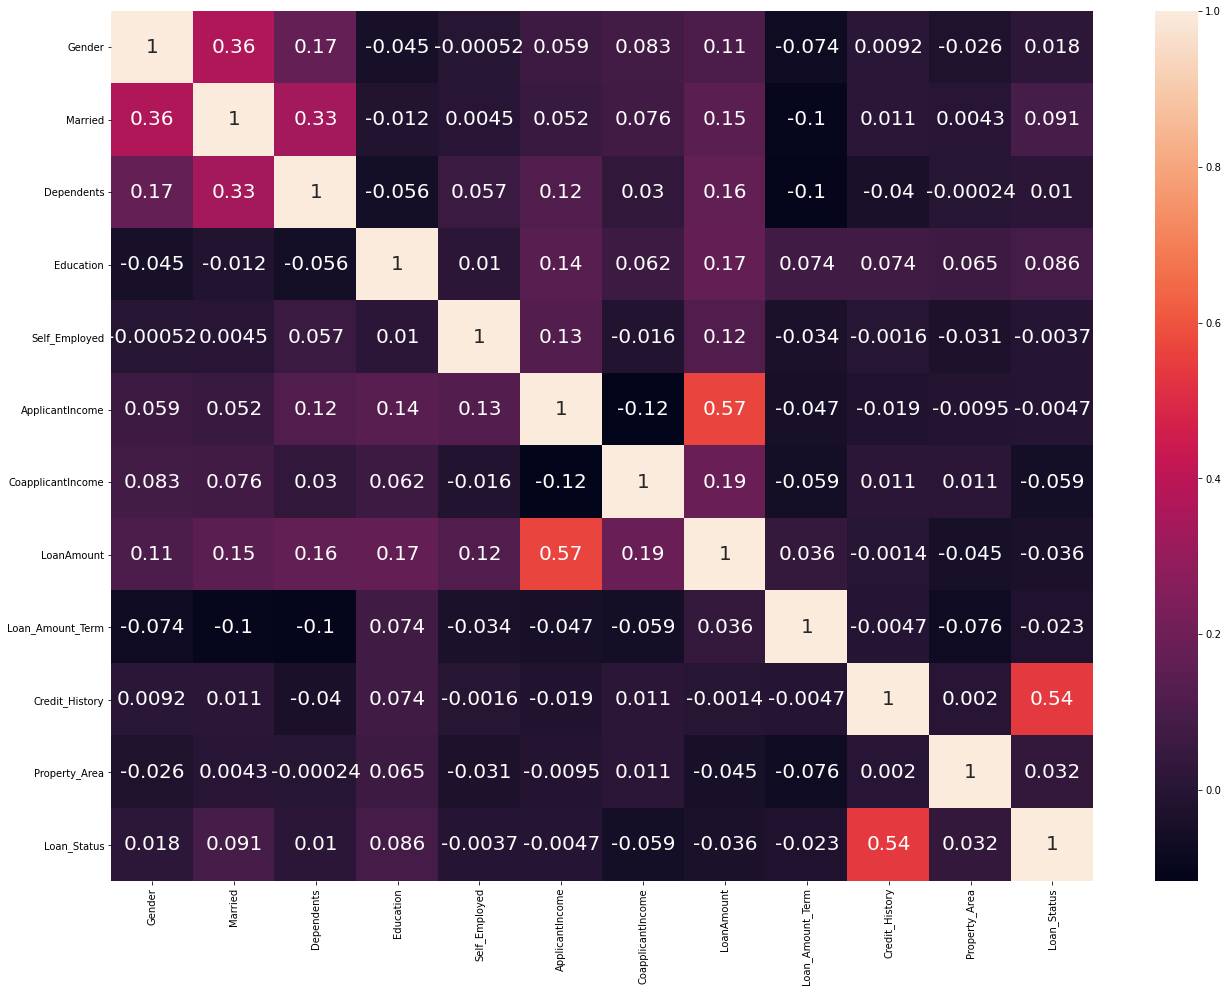

In [233]:
plt.figure(figsize=(22,16))
sns.heatmap(df.corr(), annot = True, annot_kws={'size':20})
plt.show()

In [234]:
df_matrix = df.corr()
df_matrix["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Education            0.085884
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

<AxesSubplot:>

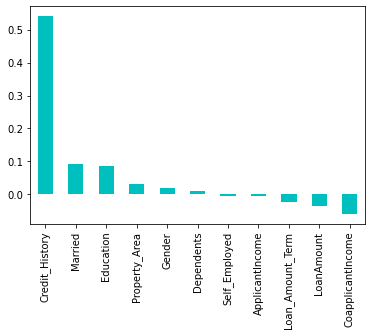

In [235]:
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color = 'c')

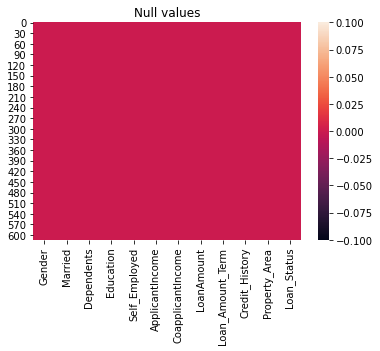

In [236]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

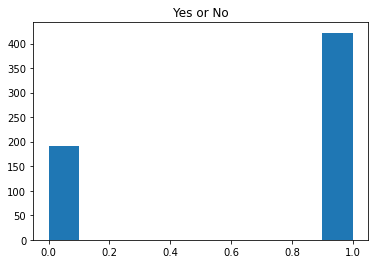

In [237]:
df["Loan_Status"].hist(grid=False)
plt.title("Yes or No")
plt.show()

Mostly got the loan

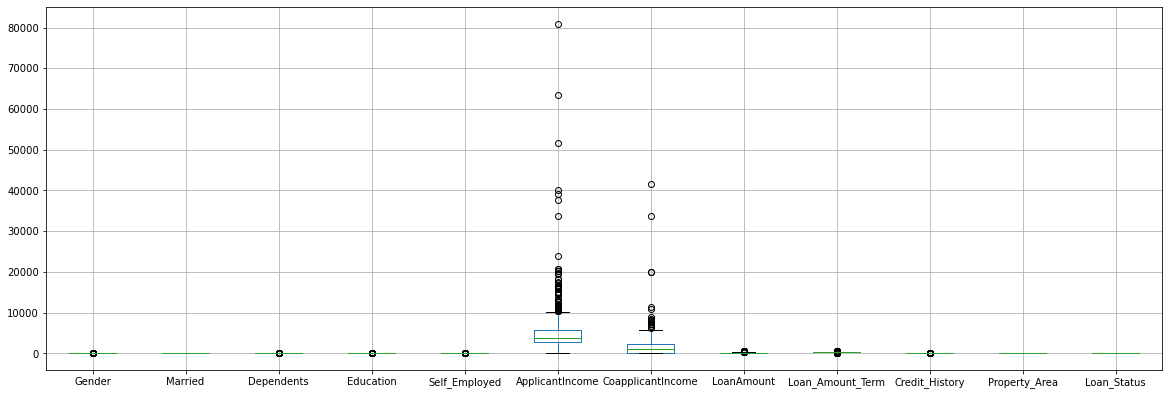

In [238]:
# Plotting boxplots for first 30 columns
df.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Applicant income and coapplicant income has outliers on higher side, 

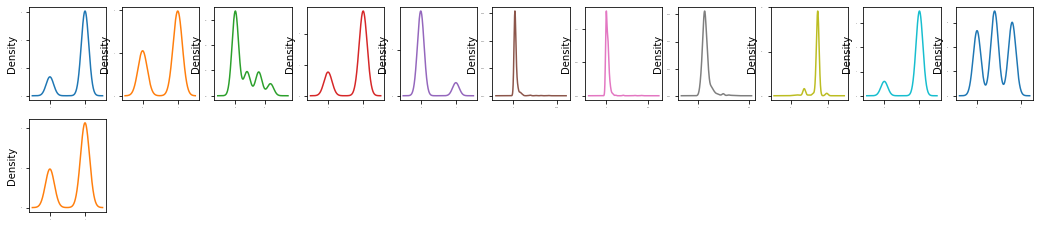

In [239]:
df.plot(kind = 'density', subplots=True, layout=(6,11), sharex=False, legend=False, fontsize = 1, figsize=(18,12))
plt.show()

In [240]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Applicant income and Coapplicant income is skewd. means higher income people got the loan. It is no surprice coz bank feel it safe to give loan to higher income people. Hence remosing the outlier will not be right with this type of data

**Feature and Target**

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [242]:
df1 = pd.DataFrame(df, columns = ['Gender','Married','Dependents','Education','Self_Employed',
                                       'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
                                       'Credit_History','Property_Area','Loan_Status'])

In [243]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1.0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,1.0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,1.0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,0.0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,1.0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1.0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3.0,1.0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1.0,1.0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2.0,1.0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [244]:
x = df1.drop('Loan_Status', axis=1)


In [245]:
x 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,1.0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1.0,1.0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0.0,1.0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0.0,0.0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0.0,1.0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1.0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3.0,1.0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1.0,1.0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2.0,1.0,0,7583,0.0,187.000000,360.0,1.0,2


In [246]:
maxAccu=0        # maximum accuracy
maxRS=0          # best random state value for which max accuracy is achieved
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is', maxAccu,  'on Random_state',maxRS)


Best Accuracy is 0.8780487804878049 on Random_state 8


In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [248]:
x = scaler.fit_transform(x)

In [249]:
x.shape

(614, 11)

**Creating train test split**

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state = 40)

In [251]:
x_train.shape

(491, 11)

In [252]:
x_test.shape

(123, 11)

In [253]:
y_train.shape

(491,)

In [254]:
y_test.shape

(123,)

### Logistic Regression

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print('accuracy', accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 83.73983739837398
[[12 19]
 [ 1 91]]
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



my accuracyy is 84%

### Decision Tree Classifier

In [256]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt  = dt.predict(x_test)
print("Accuracy", accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

Accuracy 65.04065040650406
[[11 20]
 [23 69]]
              precision    recall  f1-score   support

           0       0.32      0.35      0.34        31
           1       0.78      0.75      0.76        92

    accuracy                           0.65       123
   macro avg       0.55      0.55      0.55       123
weighted avg       0.66      0.65      0.66       123



### Random Forest Classifier

In [257]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy", accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

Accuracy 80.48780487804879
[[12 19]
 [ 5 87]]
              precision    recall  f1-score   support

           0       0.71      0.39      0.50        31
           1       0.82      0.95      0.88        92

    accuracy                           0.80       123
   macro avg       0.76      0.67      0.69       123
weighted avg       0.79      0.80      0.78       123



#### Scalar vector 

In [258]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

ad_pred = svc.predict(x_test)
print("Accuracy", accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))

Accuracy 83.73983739837398
[[12 19]
 [ 1 91]]
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



I am Checking Cross Validation for overfitting checking

### Cross Validation

In [259]:
from sklearn.model_selection import cross_val_score

dfCV = cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression model :", dfCV.mean())

Cross validation score of Logistic Regression model : 0.8045715047314408


In [260]:
dfCV = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest model:", dfCV.mean())

Cross validation score of Random Forest model: 0.7899240303878449


In [261]:
dfCV = cross_val_score(svc, x, y, cv=5)
print("Cross Validation score of SVC model :", dfCV.mean())

Cross Validation score of SVC model : 0.8029454884712781


Taking RFC with 79% 

### Hyper parameter tuning

In [268]:
from sklearn.model_selection import GridSearchCV

# Creating parameter list

parameters = {'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion': ['gini', 'entropy']}

In [269]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5, scoring="accuracy")
GCV.fit(x_train, y_train) # Fitting the data in model
GCV.best_params_ # Printing the best parameter found by GridsearchCV

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}

In [270]:
GCV_pred = GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test, GCV_pred)  # Checking final accuracy

0.8373983739837398

ROC AUC Plot

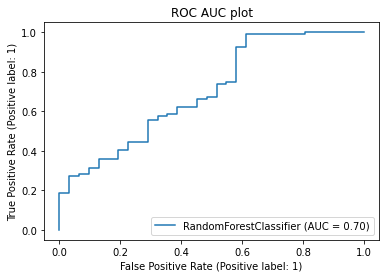

In [272]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

Final Accuracy score is 84% and AUC score is 70%

Saving the model in pickle format

In [273]:
#Pickeling of file or Serialization of a file
import joblib
joblib.dump(grid_search.best_estimator_,"loan_prediction.pkl")

['loan_prediction.pkl']